In [1]:
#Data Collection
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
chess_data = pd.read_csv('./datacleaned.csv')

In [3]:
chess_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19113.0,9800.173233,5794.936360,0.0,4794.0,9574.0,14926.0,20057.0
black_rating,19113.0,1590.045519,290.441694,789.0,1394.0,1563.0,1785.0,2723.0
turns,19113.0,60.513839,33.488264,1.0,37.0,55.0,79.0,349.0
white_rating,19113.0,1597.300005,290.022740,784.0,1401.0,1567.0,1792.0,2700.0


In [4]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      19113 non-null  int64 
 1   black_rating    19113 non-null  int64 
 2   id              19113 non-null  object
 3   rated           19113 non-null  bool  
 4   turns           19113 non-null  int64 
 5   victory_status  19113 non-null  object
 6   white_rating    19113 non-null  int64 
 7   winner          19113 non-null  object
dtypes: bool(1), int64(4), object(3)
memory usage: 1.0+ MB


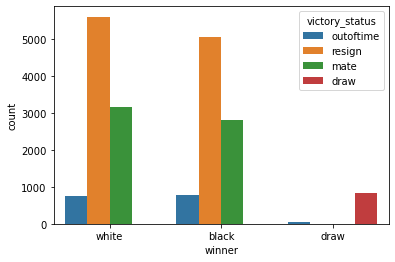

In [5]:
ax = sns.countplot(x='winner', hue='victory_status', data= chess_data)

This shows that as white seems to have some advantage as that piece goes first.
It also shows a unique result in chess that the game ends in a draw if one player does not have enough pieces to chessmate their opponent and the opponent runs out of time.

In [6]:
chess_data = chess_data.drop(chess_data.columns[0], axis=1)

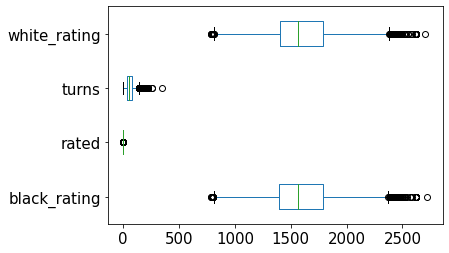

In [7]:
boxplot = chess_data.boxplot(grid=False, vert=False,fontsize=15)

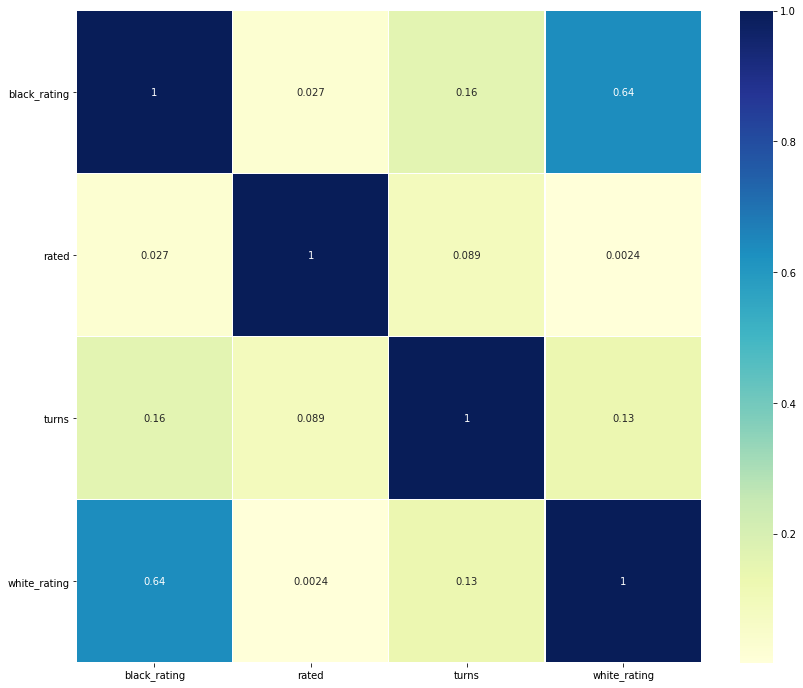

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(chess_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

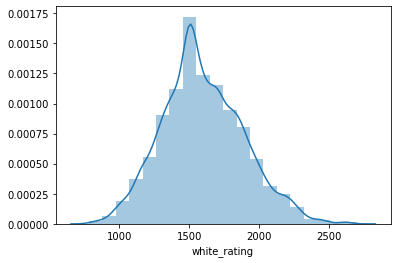

In [9]:
sns.distplot(chess_data['white_rating'], bins = 20)

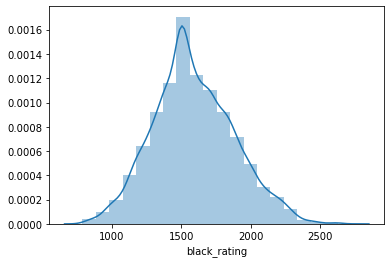

In [10]:
sns.distplot(chess_data['black_rating'], bins = 20)

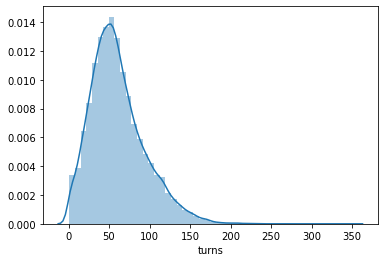

In [11]:
sns.distplot(chess_data['turns'], bins = 50)

The players' ratings have the greatest correlation next after that would be the turns and the player ratings.
The player rating distribution between players playing white and black pieces are very similar.
The majority of games last less than 150 turns.

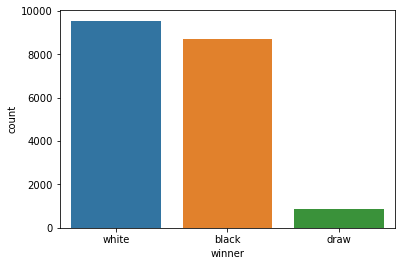

In [12]:
sns.countplot( x = chess_data['winner'], data = chess_data)

In [13]:
black_winner_difference = (chess_data['black_rating'][chess_data['winner'] == 'black'] - chess_data['white_rating'][chess_data['winner'] == 'black']).mean()
white_winner_difference = (chess_data['white_rating'][chess_data['winner'] == 'white'] - chess_data['black_rating'][chess_data['winner'] == 'white']).mean()

In [14]:
print("Rating difference for winner = black:", black_winner_difference)
print("Rating difference for winner = white:", white_winner_difference)

Rating difference for winner = black: 88.45023041474654
Rating difference for winner = white: 94.29806181246727


TypeError: regplot() got an unexpected keyword argument 'hue'

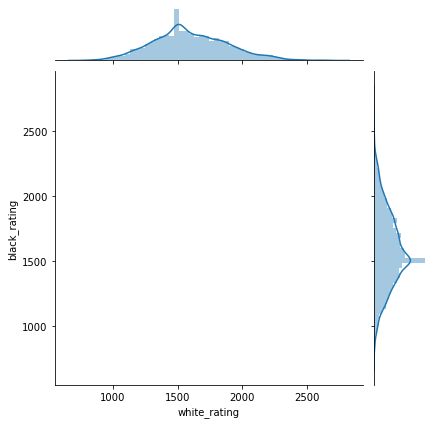

In [16]:
sns.jointplot(x='white_rating', y='black_rating', data=chess_data, hue='winner', kind="reg");

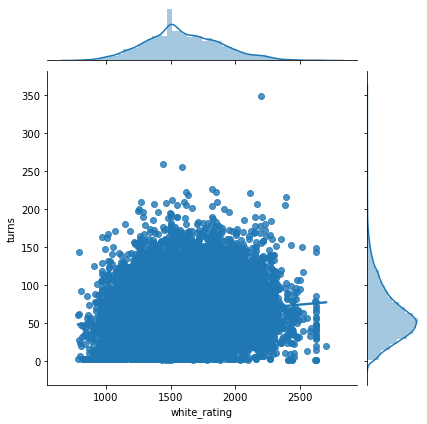

In [38]:
sns.jointplot(x='white_rating', y='turns', data=chess_data, kind="reg");

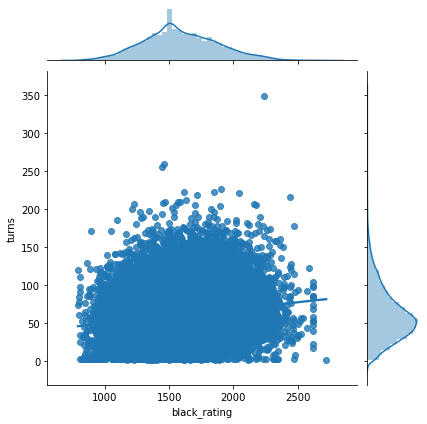

In [39]:
sns.jointplot(x='black_rating', y='turns', data=chess_data, kind="reg");